In [1]:
# Performance Comparison of SMTRI with SOTA algorithms

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

from SOTA_models import SMTRI, NB, RFSMMA, SNMFSMMA, SMAJL, RNAmigos, XGB, KNN, SVM
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [3]:
# load testing data
x_test = np.load('./data/x_test.npy')
y_test = np.load('./data/y_test.npy')

In [4]:
SMTRI = SMTRI()
SMTIR_pred = SMTRI.predict(x_test, verbose=0)

In [5]:
NB = NB()
NB_pred = NB.predict_proba(x_test)[:,1]

In [6]:
RFSMMA = RFSMMA()
RFSMMA_pred = RFSMMA.predict_proba(x_test)[:,1]

In [7]:
SNMFSMMA = SNMFSMMA()
SNMFSMMA_pred = SNMFSMMA.predict(x_test)

In [8]:
SMAJL = SMAJL()
SMAJL_pred = SMAJL.predict_proba(x_test)[:,1]

In [9]:
RNAmigos = RNAmigos()
RNAmigos_pred = RNAmigos.predict_proba(x_test)[:,1]

In [10]:
XGB = XGB()
XGB_pred = XGB.predict_proba(x_test)[:,1]

In [11]:
KNN = KNN()
KNN_pred = KNN.predict_proba(x_test)[:,1]

In [12]:
SVM = SVM()
SVM_pred = SVM.predict_proba(x_test)[:,1]

In [13]:
y_pred = [SMTIR_pred, NB_pred, RFSMMA_pred, SNMFSMMA_pred, SMAJL_pred, RNAmigos_pred, XGB_pred, KNN_pred, SVM_pred]
names = ["SMTIR", "NB", "RFSMMA", "SNMFSMMA", "SMAJL", "RNAmigos", "XGB", "KNN", "SVM"]
colors = ['red','blue','orange','green','purple','brown','pink','olive','cyan']

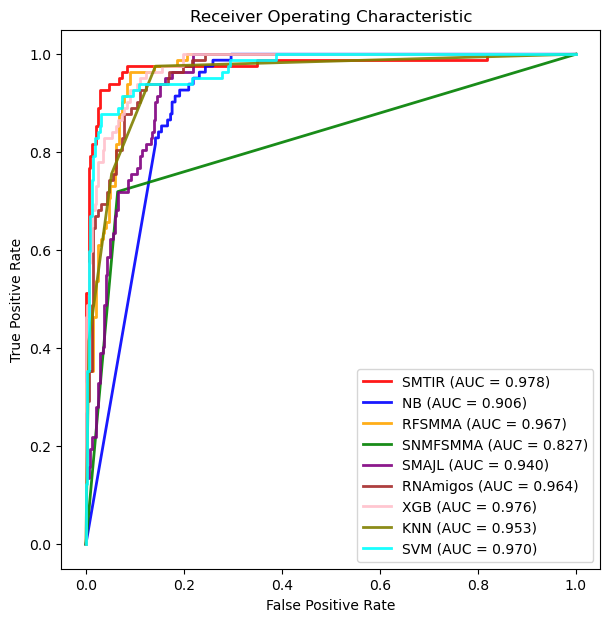

In [14]:
# print ROC

fig, ax = plt.subplots(figsize=(7, 7))
for index in range(9):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred[index])# use results instead of predictions
    roc_auc = auc(fpr, tpr)

    name = names[index]+' (AUC = %0.3f)'

    plt.plot(fpr, tpr, color=colors[index], lw=2, label=name % roc_auc, alpha=0.9)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Receiver Operating Characteristic",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.show()

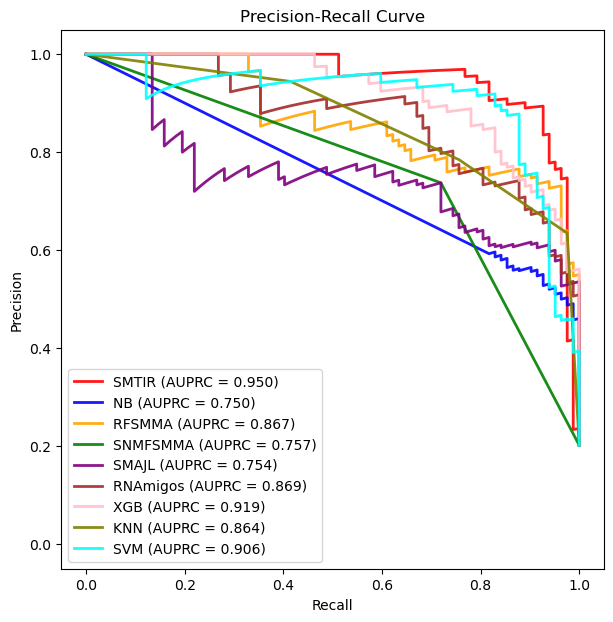

In [15]:
# print PRC

plt.figure(figsize=(7, 7))
    
for index in range(9):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred[index])
    auprc = auc(recall, precision)
    name = names[index]+' (AUPRC = %0.3f)'
    plt.plot(recall, precision, color=colors[index], lw=2, label=name % auprc, alpha=0.9)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()